Step 1: Import Libraries

Start by importing the necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

Step 2: Load and Explore Data

Load your dataset containing house features and prices using Pandas and explore it through Exploratory Data Analysis (EDA).

In [2]:
# reading dataset 
data = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [3]:
# displaying first 5 rows 
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# shape of data 
data.shape

(41188, 21)

In [5]:
# checking null values
data.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [6]:
# checking info of data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Step 3: Data Preprocessing and Feature Engineering

Based on the insights from EDA, perform data preprocessing and feature engineering to prepare the data for KMeans Clustering Algorithm.

no     36548
yes     4640
Name: y, dtype: int64


Text(0, 0.5, 'Count')

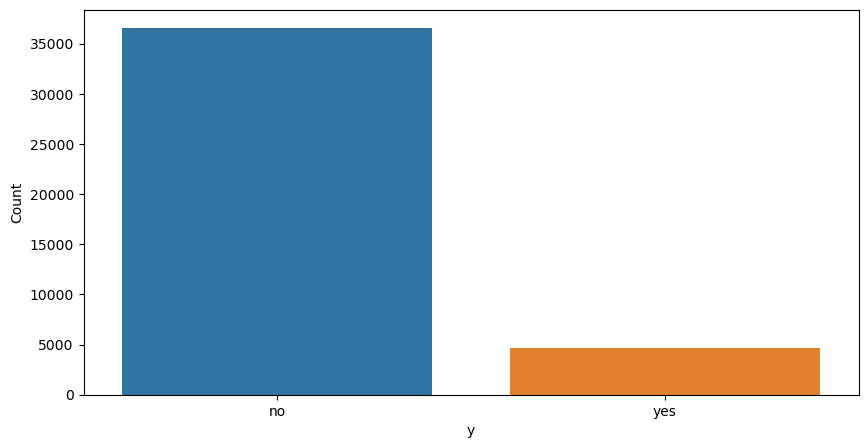

In [7]:
# value count of y column 
print(data.y.value_counts())

# count plot 
plt.figure(figsize=(10, 5))
sns.countplot(x='y',data=data)
plt.xlabel('y')
plt.ylabel('Count')

Text(0.5, 1.0, 'Histogram plot of age')

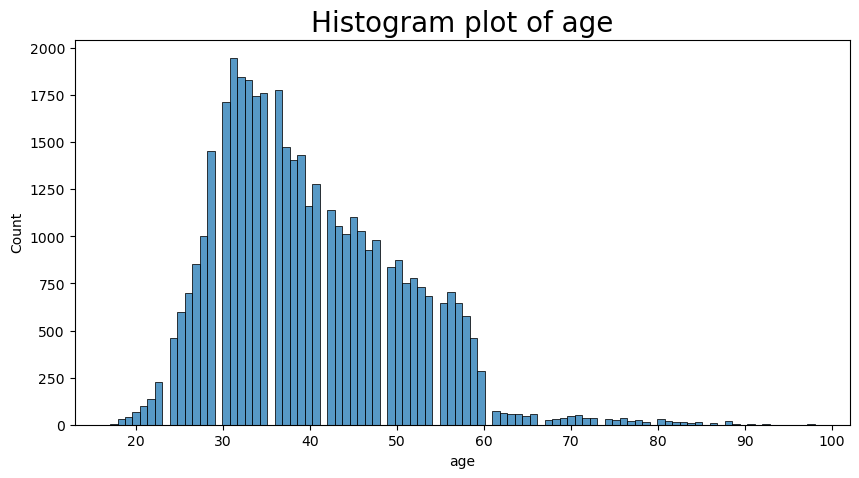

In [8]:
# histogram plot of age
plt.figure(figsize=(10, 5))
sns.histplot(data.age)
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Histogram plot of age', fontsize=20)

Step 4: Create and Train the KMeans Model

Create a KMeans model using scikit-learn, Scaling using Standard Scaler.

In [9]:
# dropping y column from data
data_new = data.drop(['y'], axis=1)

In [10]:
data_new.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [11]:
# there are object features(categorical features) , lets change them to dummies
data_new = pd.get_dummies(data_new)
data_new.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [12]:
# checking shape
data_new.shape

(41188, 63)

In [13]:
# scaling 
sc = StandardScaler()
data_scaled = sc.fit_transform(data_new)

In [14]:
data_scaled

array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 1.62899323, -0.42150051, -0.56592197, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [-0.29018564, -0.12451981, -0.56592197, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 3.26029527, -0.07438021,  0.15610492, ...,  2.94732687,
        -2.51442063, -0.1857    ]])

In [15]:
# KMeans clustering

# taking only 2 clusters 
knn = KMeans(n_clusters=2)

# fit on data 
knn_ = knn.fit_predict(data_scaled)

In [16]:
data['cluster'] = knn_

# cluster and y column from data
data[['cluster', 'y']]

,cluster,y
0,1,no
1,1,no
2,1,no
3,1,no
4,1,no
...,...,...
41183,0,yes
41184,0,no
41185,0,no
41186,0,yes


In [18]:
# lets check if y is cluster_label or not!
pred = knn_
y_test = data['y']
y_test1, y_test2 = [], []
for i in y_test:
    if i == 'yes':
        y_test1.append(1)
        y_test2.append(0)
    else:
        y_test1.append(0)
        y_test2.append(1)


In [19]:
# accuracy score 
acc_1 = accuracy_score(y_test1 , pred)
acc_2 = accuracy_score(y_test2 , pred)
print('if consider 1 in column cluster_label as yes then the acuracy of this column be the column y will be %f, otherwise the accuracy will be %f'%(acc_1,acc_2))

if consider 1 in column cluster_label as yes then the acuracy of this column be the column y will be 0.296688, otherwise the accuracy will be 0.703312
